In [17]:
df = pd.read_csv('turkish_movie_sentiment_dataset.csv')
df.head()

,comment,film_name,point
0,\n Jean Reno denince zate...,Sevginin Gücü,"5,0"
1,\n Ekşın falan izlemek is...,Sevginin Gücü,"5,0"
2,\n Bu yapım hakkında öyle...,Sevginin Gücü,"5,0"
3,\n finali yeter... (sting...,Sevginin Gücü,"5,0"
4,\n Jean Reno..\r\nbu adam...,Sevginin Gücü,"5,0"


In [18]:
df['comment'][0]

'\n                      Jean Reno denince zaten leon filmi gelir akla izlemeyen kalmamıştır ama kaldıysada ee ne duruyorsun hemen izle :)\n        \n            '

In [19]:
df['comment'].replace('\n|\t|\r',' ',regex=True,inplace=True)
df.iloc[1,0]

'                       Ekşın falan izlemek istiyorsanız eğer bunu izlemeyiin dostlarım keza ilk sahne hariç ekşın filmde yerini gittikçe duygusallığa bırakır.. Mathildanın Leonun evine geldiğinde ağladığı sahnede ben de ağlamış olabilirim.. Tamam olabilirim değil ağladım; ama sen de izle ağlarsın dostooom.   Etkileyici bir film, sıkmıyor hiçbir salise boyunca sizi.  " Ben artık büyüdüm Leon, yaşlanıyorum. "  " Hayat hep böyle zor mu, yoksa sadece çocukken mi? "                      '

Görüldüğü gibi metinlerin başındaki gereksiz boş karakterler ve aradaki işaretleri kaldırmamız gerekiyor

In [20]:
import re
df['comment'] = df['comment'].apply(lambda text: re.sub(r"[^\w\s]", '', text))
df['comment'] = df['comment'].apply(lambda text: re.sub(r"\s+", ' ', text)) # bug => ilk ve son karakter ' ' oluyor. çözmek için ; 
df['comment'] = df['comment'].apply(lambda text: text[1:-1])

In [21]:
df['comment'] = df['comment'].apply(lambda text: text.lower())

Metinlerimizi daha düzgün bir hale getirdik

In [22]:
df['comment'][1]

'ekşın falan izlemek istiyorsanız eğer bunu izlemeyiin dostlarım keza ilk sahne hariç ekşın filmde yerini gittikçe duygusallığa bırakır mathildanın leonun evine geldiğinde ağladığı sahnede ben de ağlamış olabilirim tamam olabilirim değil ağladım ama sen de izle ağlarsın dostooom etkileyici bir film sıkmıyor hiçbir salise boyunca sizi ben artık büyüdüm leon yaşlanıyorum hayat hep böyle zor mu yoksa sadece çocukken mi'

Sütun isimlerini daha anlamlı olacağını düşündüğümüz isimlere dönüştürdük

In [23]:
df.rename(columns = {'comment':'Text','point':'Score'}, inplace = True)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(df['Text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [25]:
X = tfidf.transform(df['Text'])

In [26]:
print([X[1, tfidf.vocabulary_['keza']]])

[0.13341727846028953]


In [27]:
print([X[1, tfidf.vocabulary_['film']]])

[0.029285682679088054]


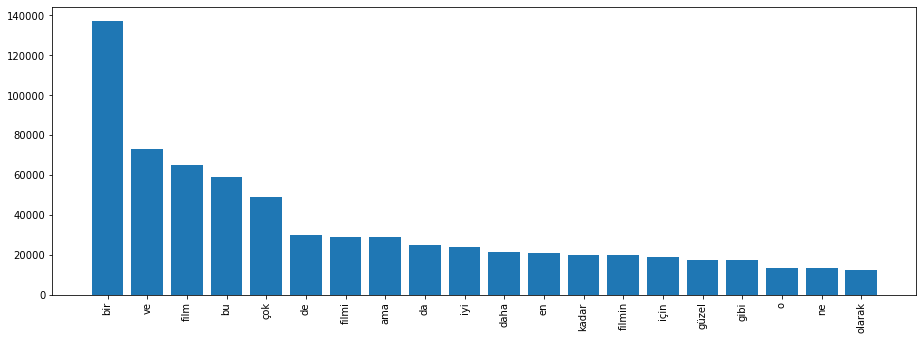

In [28]:
from collections import Counter
import matplotlib.pyplot as plt
most_common = Counter(" ".join(df["Text"]).split()).most_common(20)
kelime = []
count = []
for item in most_common:
    kelime.append(item[0])
    count.append(item[1])
fig = plt.figure()
ax = fig.add_axes([3,1,2,1])
plt.xticks(rotation='vertical')
ax.bar(kelime,count)
plt.show()

In [35]:
convertInt = lambda value: float(value.replace(',','.'))
df['Score'] = df['Score'].apply(convertInt)
df.head()

,Text,film_name,Score
0,jean reno denince zaten leon filmi gelir akla ...,Sevginin Gücü,5.0
1,ekşın falan izlemek istiyorsanız eğer bunu izl...,Sevginin Gücü,5.0
2,bu yapım hakkında öyle çok şey yazabilirim ki ...,Sevginin Gücü,5.0
3,finali yeter sting shape of my heart bazıları ...,Sevginin Gücü,5.0
4,jean reno bu adam kusursuz biri ve oyunculugu ...,Sevginin Gücü,5.0


In [36]:
df.dropna(inplace=True)
df[df['Score'] != 3]
df['Positivity'] = np.where(df['Score'] > 3, 1, 0)
cols = ['film_name','Score']
df.drop(cols, axis=1, inplace=True)
df.head(30)

,Text,Positivity
0,jean reno denince zaten leon filmi gelir akla ...,1
1,ekşın falan izlemek istiyorsanız eğer bunu izl...,1
2,bu yapım hakkında öyle çok şey yazabilirim ki ...,1
3,finali yeter sting shape of my heart bazıları ...,1
4,jean reno bu adam kusursuz biri ve oyunculugu ...,1
5,this is from mathilda boom olağanüstü ne söyle...,1
6,çok beğendim etkisinde kaldımmuhteşem bir oyun...,1
7,niye bu kadar geç buldum seni,1
8,film güzel ama çok abartıldığını düşünüyorum ö...,0
9,hayatimin filmlerinden biri her izledigimde il...,1


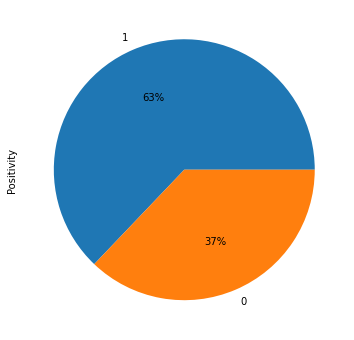

In [38]:
plt.rcParams["figure.figsize"][0] = 6
plt.rcParams["figure.figsize"][1] = 6
df['Positivity'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [39]:
from sklearn.model_selection import train_test_split
X = df.Text
y = df.Positivity
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 62420 entries with 37.04% negative, 62.96% positive


In [40]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 20807 entries with 37.36% negative, 62.64% positive


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [43]:
n_features = np.arange(10000,50001,10000)
tfidf = TfidfVectorizer()
cv = CountVectorizer()
def nfeature_accuracy_checker(vectorizer=tfidf, n_features=n_features, stop_words=None, ngram_range=(1, 3), classifier=None):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [45]:
from sklearn.neighbors import KNeighborsClassifier
    

rf = KNeighborsClassifier(n_neighbors=3) 
feature_result_tgt = nfeature_accuracy_checker(classifier=rf)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


Test result for 10000 features
accuracy score: 63.88%
Test result for 20000 features
accuracy score: 63.63%
Test result for 30000 features
accuracy score: 63.51%
Test result for 40000 features
accuracy score: 63.44%
Test result for 50000 features
accuracy score: 63.36%


In [46]:
from sklearn.neighbors import KNeighborsClassifier
    

rf = KNeighborsClassifier(n_neighbors=2) 
feature_result_tgt = nfeature_accuracy_checker(classifier=rf)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


Test result for 10000 features
accuracy score: 63.28%
Test result for 20000 features
accuracy score: 63.17%
Test result for 30000 features
accuracy score: 63.15%
Test result for 40000 features
accuracy score: 63.16%
Test result for 50000 features
accuracy score: 63.20%


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced") 
feature_result_tgt = nfeature_accuracy_checker(classifier=rf)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Test result for 10000 features
accuracy score: 77.39%
Test result for 20000 features
accuracy score: 77.50%
Test result for 30000 features
accuracy score: 77.45%
Test result for 40000 features
accuracy score: 77.57%
Test result for 50000 features
accuracy score: 77.69%


In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0) 
feature_result_tgt = nfeature_accuracy_checker(classifier=rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Test result for 10000 features
accuracy score: 77.03%
Test result for 20000 features
accuracy score: 76.96%
Test result for 30000 features
accuracy score: 76.99%
Test result for 40000 features
accuracy score: 77.22%
Test result for 50000 features
accuracy score: 77.01%


In [44]:
from sklearn.linear_model import LogisticRegression
c_list = [0.01,0.05,0.25,0.5,1]
for c in c_list:
    rf = LogisticRegression(C=c,max_iter=5000) 
    feature_result_tgt = nfeature_accuracy_checker(classifier=rf)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Test result for 10000 features
accuracy score: 65.48%
Test result for 20000 features
accuracy score: 64.25%
Test result for 30000 features
accuracy score: 63.71%
Test result for 40000 features
accuracy score: 63.47%
Test result for 50000 features
accuracy score: 63.29%
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Test result for 10000 features
accuracy score: 75.28%
Test result for 

En optimal score'u logisticRegression da feature=30000 ve c=1 için aldık.

In [49]:
from sklearn.metrics import classification_report
rf = LogisticRegression(C=1,max_iter=5000) 
cv = CountVectorizer(max_features=30000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.72      0.64      0.68      7774
    positive       0.80      0.85      0.82     13033

    accuracy                           0.77     20807
   macro avg       0.76      0.74      0.75     20807
weighted avg       0.77      0.77      0.77     20807



In [50]:
y_pred = sentiment_fit.predict(["İzlerken zevk aldım çok güzeldi"])
y_pred

array([1])

In [51]:
y_pred = sentiment_fit.predict(["İzlemenizi tavsiye etmem"])
y_pred

array([0])

In [52]:
y_pred = sentiment_fit.predict(["İzlemenizi tavsiye ederim"])
y_pred

array([1])